<p style="text-align: center">
<img src="../../assets/images/dtlogo.png" alt="Duckietown" width="50%">
</p>

# 🚙 💻 05 - Wheel encoder based odometry (SOLUTIONS)

# 🚙 💻 Let's get started!

In this activity you will write a function that produces an estimate of the pose of the Duckiebot, given mesurements from the wheel encoders and an initial position:

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
x0 = y0 = 0 # meters
theta0 = 0 # radians

In [3]:
import numpy as np 
 
N_tot = 135 # total number of ticks per revolution
alpha = 2 * np.pi / N_tot # wheel rotation per tick in radians

print(f"The angular resolution of our encoders is: {np.rad2deg(alpha)} degrees")

The angular resolution of our encoders is: 2.6666666666666665 degrees


In [4]:
# Feel free to play with the numbers to get an idea of the expected outcome

ticks_left = 1
prev_tick_left = 0

ticks_right = 0
prev_tick_right = 0

In [5]:
# How much would the wheels rotate with the above tick measurements? 

delta_ticks_left = ticks_left-prev_tick_left # delta ticks of left wheel 
delta_ticks_right = ticks_right-prev_tick_right # delta ticks of right wheel 

rotation_wheel_left = alpha * delta_ticks_left # total rotation of left wheel 
rotation_wheel_right = alpha * delta_ticks_right # total rotation of right wheel 

print(f"The left wheel rotated: {np.rad2deg(rotation_wheel_left)} degrees")
print(f"The right wheel rotated: {np.rad2deg(rotation_wheel_right)} degrees")

The left wheel rotated: 2.6666666666666665 degrees
The right wheel rotated: 0.0 degrees


In [6]:
# What is the radius of your wheels? 
R = 0.0318 # insert value measured by ruler, in *meters*

In [7]:
# What is the distance travelled by each wheel?

d_left = R * rotation_wheel_left 
d_right = R * rotation_wheel_right

print(f"The left wheel travelled: {d_left} meters")
print(f"The right wheel rotated: {d_right} meters")

The left wheel travelled: 0.0014800392056911916 meters
The right wheel rotated: 0.0 meters


In [8]:
# How much has the robot travelled? 

d_A = (d_left + d_right)/2

print(f"The robot has travelled: {d_A} meters")

The robot has travelled: 0.0007400196028455958 meters


In [9]:
# What is the baseline length of your robot? 

baseline_wheel2wheel = 0.1 #  Distance between the center of the two wheels, expressed in meters 

In [10]:
# How much has the robot rotated? 

Delta_Theta = (d_right-d_left)/baseline_wheel2wheel # expressed in radians

print(f"The robot has rotated: {np.rad2deg(Delta_Theta)} degrees")

The robot has rotated: -0.8480000000000001 degrees


## Calculating the rotation of each wheel

Implement the function `delta_phi` inside the file `packages/solution/odometry_activity.py`.
This function computes wheel rotation in radians from wheel rotation readings in encoder ticks.

In [11]:
from typing import Tuple

def delta_phi(ticks: int, prev_ticks: int, resolution: int) -> Tuple[float, float]:
    """
        Args:
            ticks: Current tick count from the encoders.
            prev_ticks: Previous tick count from the encoders.
            resolution: Number of ticks per full wheel rotation returned by the encoder.
        Return:
            rotation_wheel: Rotation of the wheel in radians.
            ticks: current number of ticks.
    """

    delta_ticks = ticks-prev_ticks

    # Assuming no wheel slipping
    dphi = 2*np.pi*delta_ticks/resolution


    return dphi, ticks

## Estimating the odometry

Implement the function `pose_estimation` inside the file `packages/solution/odometry_activity.py`.
This function computes the `(x, y, theta)` estimate by aggregating computed wheel rotations and the (known) geometry of the robot.

In [14]:
def pose_estimation(
        R: float,
        baseline: float,
        x_prev: float,
        y_prev: float,
        theta_prev: float,
        delta_phi_left: float,
        delta_phi_right: float,
) -> Tuple[float, float, float]:
    """
    Calculate the current Duckiebot pose using the dead-reckoning approach.

    Args:
        R:                  radius of wheel (assumed identical) - this is fixed in simulation,
                            and will be imported from your saved calibration for the real robot
        baseline:           distance from wheel to wheel; 2L of the theory
        x_prev:             previous x estimate - assume given
        y_prev:             previous y estimate - assume given
        theta_prev:         previous orientation estimate - assume given
        delta_phi_left:     left wheel rotation (rad)
        delta_phi_right:    right wheel rotation (rad)

    Return:
        x:                  estimated x coordinate
        y:                  estimated y coordinate
        theta:              estimated heading
    """

    # x_curr = x_prev + R*(delta_phi_left+delta_phi_right)*np.cos(theta_prev)/2
    # y_curr = y_prev + R*(delta_phi_left+delta_phi_right)*np.sin(theta_prev)/2
    # theta_curr = theta_prev + R*(delta_phi_right-delta_phi_left)/(baseline)

   
    w = [R, 2*R / baseline, 1]

    x = np.array(
        [
            [
                (delta_phi_left + delta_phi_right) * np.cos(theta_prev) / 2,
                (delta_phi_left + delta_phi_right) * np.sin(theta_prev) / 2,
                0,
            ],
            [0, 0, (delta_phi_right - delta_phi_left) / 2],
            [x_prev, y_prev, theta_prev],
        ]
    )

    x_curr, y_curr, theta_curr = np.array(w).dot(x)
    
    return x_curr, y_curr, theta_curr


## Test it out

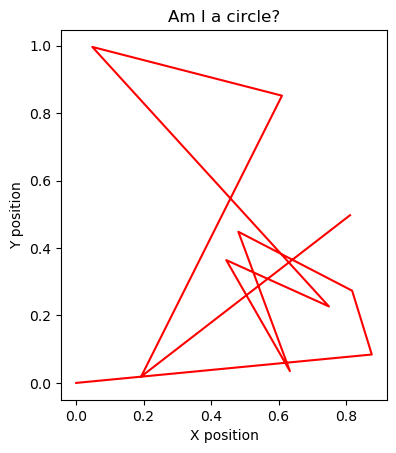

In [17]:
from tests.unit_test import UnitTestOdometry

from solution.odometry_activity import pose_estimation

# This function has hardcoded values (bad practice!) to test the `pose_estimation` function above.
# The test will be successful if you get a circle. Anything short of a circle.. probably best to go back and check.

UnitTestOdometry(R, baseline_wheel2wheel, pose_estimation)